In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12

from Settings import *
import Variation
import Forms

In [2]:
# Just a simple wrapper method for what is defined in Variation
def solve(Hamiltonian, formFunc):
    # Set up the form and normalize it
    form, var, bounds, volumeElement, params = formFunc()
    
    print(sp.latex(form))
    
    normForm = Variation.normalize(form, var, bounds, volumeElement)

    print(sp.latex(normForm))
    
    # Parameterize the hamiltonian using our exponential form
    energyFunc = Variation.parameterizeHamiltonian(Hamiltonian, normForm, var, bounds, volumeElement)
    
    print(sp.latex(energyFunc))
    
    # Minimize the energy, and plot the result
    optimalParam, minEnergy = Variation.minimizeHamiltonian(energyFunc, params, plot=True)
    
    plt.title(r'$\Psi = '+sp.latex(form)+'$')
    plt.tight_layout()
    
    print(f'Ground state energy: {minEnergy:.10} eV')

In [3]:
# Some examples of Hamiltonians
def BohrHamiltonian(psi, var):
    r, theta, phi = var
    laplacian = 1/r**2 * sp.diff(r**2 * sp.diff(psi, r), r) + 1/(r**2 * sp.sin(theta)) * sp.diff(sp.sin(theta) * sp.diff(psi, theta), theta) + 1/(r**2 * sp.sin(theta)**2) * sp.diff(sp.diff(psi, phi), phi)
    kineticTerm = -hbar**2 / (2*me) * laplacian
    potentialTerm = -e**2 / (4 * e0 * sp.pi * r) * psi
    return (kineticTerm + potentialTerm)/e

# Three dimensional quantum harmonic oscillator potential
# We'll just assume that the angular frequency w is 1 for simplicity
w = 1
def ThreeDimQHO(psi, var):
    x, y, z = var
    kineticTerm = -hbar**2 / (2*me) * (sp.diff(sp.diff(psi, x), x) + sp.diff(sp.diff(psi, y), y) + sp.diff(sp.diff(psi, z), z))
    potentialTerm = .5 * me * w**2 * (x**2 + y**2 + z**2)
    return (kineticTerm + potentialTerm)/hbar

In [7]:
# Set up an exponential function and normalize it over just the radial coordinate
radialExp, var, bounds, volumeElement, params = Forms.RadialExponential()
normRadialExp = Variation.normalize(radialExp, var, bounds, volumeElement)
print(normRadialExp)

# Set up an exponential function and normalize it over all spherical coordinates
sphericalExp, var, bounds, volumeElement, params = Forms.SphericalExponential()
normSphericalExp = Variation.normalize(sphericalExp, var, bounds, volumeElement)
print(normSphericalExp)

2*b**(3/2)*exp(-b*r)
b**(3/2)*exp(-b*r)/sqrt(pi)


e^{- b r}
\frac{b^{\frac{3}{2}} e^{- b r}}{\sqrt{\pi}}
2 \pi \left(\frac{1.90499105574298 \cdot 10^{-20} b^{2}}{\pi} - \frac{2.26189102246598 \cdot 10^{-9} b}{\pi^{2}}\right)
Ground state energy: -13.60569314 eV


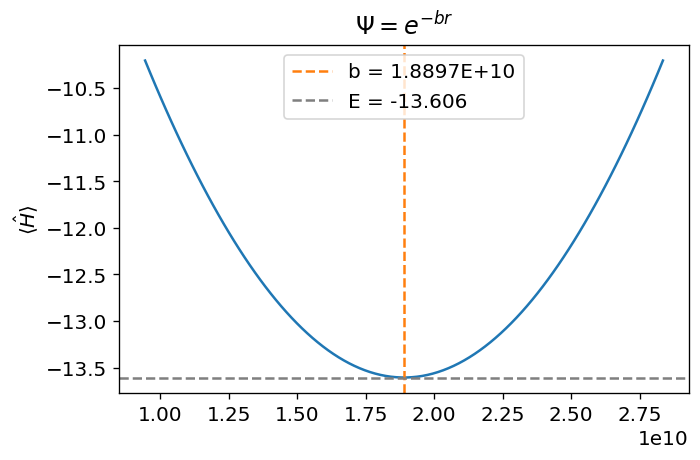

In [8]:
solve(BohrHamiltonian, Forms.SphericalExponential)
plt.savefig('images/gs_hydrogen_symbolic.png')
plt.show()

e^{- b r^{2}}
\frac{2^{\frac{3}{4}} b^{\frac{3}{4}} e^{- b r^{2}}}{\pi^{\frac{3}{4}}}
2 \pi \left(- \frac{4.52378204493196 \cdot 10^{-9} \sqrt{2} \sqrt{b}}{\pi^{\frac{5}{2}}} + \frac{5.71497316722894 \cdot 10^{-20} b}{\pi}\right)
Ground state energy: -11.54887103 eV


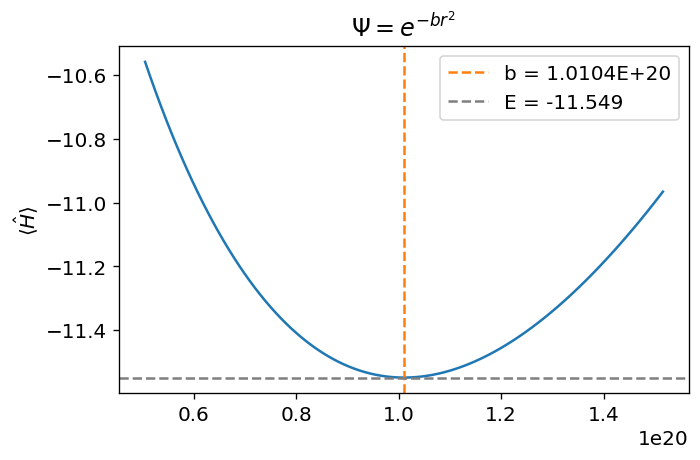

In [9]:
solve(BohrHamiltonian, Forms.SphericalGaussian)
plt.savefig('images/gs_hydrogen_gaussian.png')
plt.show()

r e^{- b r^{2}}
\frac{2 \cdot 2^{\frac{3}{4}} \sqrt{3} b^{\frac{5}{4}} r e^{- b r^{2}}}{3 \pi^{\frac{3}{4}}}
2 \pi \left(- \frac{3.0158546966213 \cdot 10^{-9} \sqrt{2} \sqrt{b}}{\pi^{\frac{5}{2}}} + \frac{4.44497913006695 \cdot 10^{-20} b}{\pi}\right)
Ground state energy: -6.599354872 eV


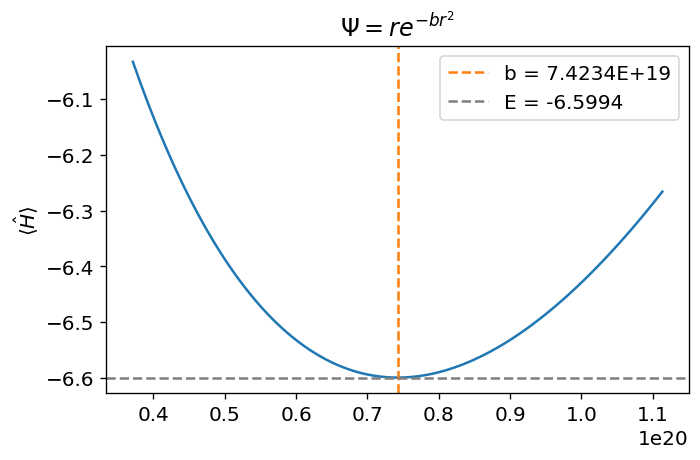

In [10]:
solve(BohrHamiltonian, Forms.SphericalGaussianProduct)
plt.savefig('images/gs_hydrogen_gaussian_product.png')
plt.show()

e^{- b r} \sin{\left(\theta \right)}
\frac{\sqrt{6} b^{\frac{3}{2}} e^{- b r} \sin{\left(\theta \right)}}{2 \sqrt{\pi}}
2 \pi \left(\frac{3.80998211148596 \cdot 10^{-20} b^{2}}{\pi} - \frac{2.26189102246598 \cdot 10^{-9} b}{\pi^{2}}\right)
Ground state energy: -6.802846570 eV


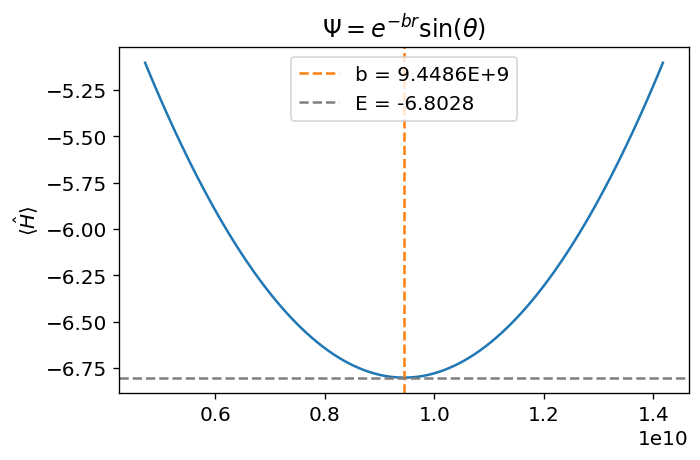

In [4]:
solve(BohrHamiltonian, Forms.SphericalExponentialTrigTheta)
plt.savefig('images/gs_hydrogen_exp_trig.png')
plt.show()

In [4]:
solve(BohrHamiltonian, Forms.SphericalExponentialTrigPhi)
plt.savefig('images/gs_hydrogen_exp_trig_phi.png')
plt.show()

e^{- i \phi} e^{- b r}
\frac{b^{\frac{3}{2}} e^{- i \phi} e^{- b r}}{\sqrt{\pi}}
\text{NaN}


IndexError: list index out of range

In [5]:
-6.802846570 * 2